# Stock Price Prediction Using Historical S&P 500 Data  
**Author:** Your Name  
**Date:** 07/10/2025  
**Objective:** Predict future stock prices using historical data and machine learning models.  

## Introduction

This project aims to predict the future prices of stocks in the S&P 500 index by analyzing five years of historical stock data. We will explore trends, visualize price movements, and build models to forecast stock prices.

Unlike projects that use social media sentiment or news, this analysis focuses purely on numerical historical data for price prediction.

## Dataset Overview

- Dataset: S&P 500 stocks historical prices over 5 years  
- Source: Kaggle (or specify where you got the CSV)  
- File: `all_stocks_5yr.csv`  
- Contains daily stock prices with columns like:  
  - `date`  
  - `open`  
  - `close`  
  - `high`  
  - `low`  
  - `volume`  
  - `Name` (stock ticker symbol)

## Step 1. Data Loading and Basic Exploration

In [2]:
import pandas as pd

# Load the data from the CSV file
df = pd.read_csv('data/all_stocks_5yr.csv')

# Show summary info about the DataFrame
print(df.info())

# Display the first 5 rows of the data
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB
None
         date   open   high    low  close    volume Name
0  2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1  2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2  2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3  2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4  2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL


### Exploration for Step 1: Data Loading and Basic Exploration

We started by loading the dataset containing 5 years of historical stock prices for S&P 500 companies using the `pandas` library. After loading the data, we explored its structure and contents using `.info()` and `.head()`.

### Summary:
- **Rows:** 619,040  
- **Columns:** 7 — `date`, `open`, `high`, `low`, `close`, `volume`, `Name`  
- The `Name` column indicates the stock ticker symbol (e.g., AAPL for Apple).
- The `date` column is currently in string format and will be converted to datetime in the cleaning step.
- Some missing values are present in the `open`, `high`, and `low` columns.

This initial step provides a high-level understanding of the dataset and prepares us for cleaning and preprocessing in the next step.

## Step 2. Data Cleaning & Preprocessing

In [8]:
# Check for missing values in each column
print(df.isnull().sum())

# Fill missing values in 'open', 'high', and 'low' columns using forward fill (ffill)
df['open'] = df['open'].ffill()
df['high'] = df['high'].ffill()
df['low'] = df['low'].ffill()

# Verify if missing values are handled
print(df.isnull().sum())

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by stock name and date
df = df.sort_values(by=['Name', 'date']).reset_index(drop=True)

# Show the cleaned DataFrame info and sample rows
print(df.info())
print(df.head())

date          0
open          0
high          0
low           0
close         0
volume        0
Name          0
MA_7       3030
MA_30     14645
dtype: int64
date          0
open          0
high          0
low           0
close         0
volume        0
Name          0
MA_7       3030
MA_30     14645
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619040 non-null  float64       
 2   high    619040 non-null  float64       
 3   low     619040 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  object        
 7   MA_7    616010 non-null  float64       
 8   MA_30   604395 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 42.5+ MB

## ✅ Explanation for Step 2: Data Cleaning & Preprocessing

Before we can train a model, the raw data needs to be cleaned and formatted properly. This step ensures the data is consistent, complete, and in the right structure for analysis.

### What we did:

1. **Handled Missing Values:**  
   The columns `open`, `high`, and `low` had a few missing values. We used **forward fill (`ffill`)** to fill them using the last available valid value. This is a common approach in time series data to maintain continuity without introducing sudden jumps.

2. **Converted `date` Column to Datetime Format:**  
   The `date` column was originally in string format. We converted it to `datetime` so we can sort it chronologically and perform time-based operations (like rolling averages and time splitting).

3. **Sorted the Data:**  
   We sorted the data by `Name` (stock ticker) and `date` to ensure each stock's historical data is ordered correctly for time series analysis.

4. **Verified Cleaned Data:**  
   After cleaning, we printed the updated structure to confirm:
   - All missing values were handled
   - Data types are correct
   - The dataset is well-structured for modeling

> ✅ At this point, the data is fully cleaned and ready for feature engineering and visualization.

## Step 3. Feature Engineering

In [5]:
# Example: Add Moving Averages of Closing Price (7-day and 30-day)
df['MA_7'] = df.groupby('Name')['close'].transform(lambda x: x.rolling(window=7).mean())
df['MA_30'] = df.groupby('Name')['close'].transform(lambda x: x.rolling(window=30).mean())

# Check the new columns
print(df[['Name', 'date', 'close', 'MA_7', 'MA_30']].head(10))

  Name       date  close       MA_7  MA_30
0    A 2013-02-08  45.08        NaN    NaN
1    A 2013-02-11  44.60        NaN    NaN
2    A 2013-02-12  44.62        NaN    NaN
3    A 2013-02-13  44.75        NaN    NaN
4    A 2013-02-14  44.58        NaN    NaN
5    A 2013-02-15  42.25        NaN    NaN
6    A 2013-02-19  43.01  44.127143    NaN
7    A 2013-02-20  42.24  43.721429    NaN
8    A 2013-02-21  41.63  43.297143    NaN
9    A 2013-02-22  41.80  42.894286    NaN


### ✅ Explanation for Step 3: Feature Engineering

To help the model better understand trends and patterns in the stock prices, we created new features called **moving averages**:

- **7-day Moving Average (MA_7):** The average closing price over the past 7 trading days.
- **30-day Moving Average (MA_30):** The average closing price over the past 30 trading days.

We calculated these moving averages **separately for each stock** using group-by, ensuring the averages reflect the stock's own price history.

### Why moving averages?

- They smooth out short-term fluctuations.
- Help identify underlying trends.
- Are commonly used indicators in financial analysis.

### Note on NaN values:

- The first few rows for each stock have `NaN` in moving averages because there isn’t enough data yet to calculate the average (for example, the 7-day MA needs at least 7 data points).

This feature engineering step enriches the dataset with meaningful signals to improve model performance.

## Step 4. Data Visualization Example

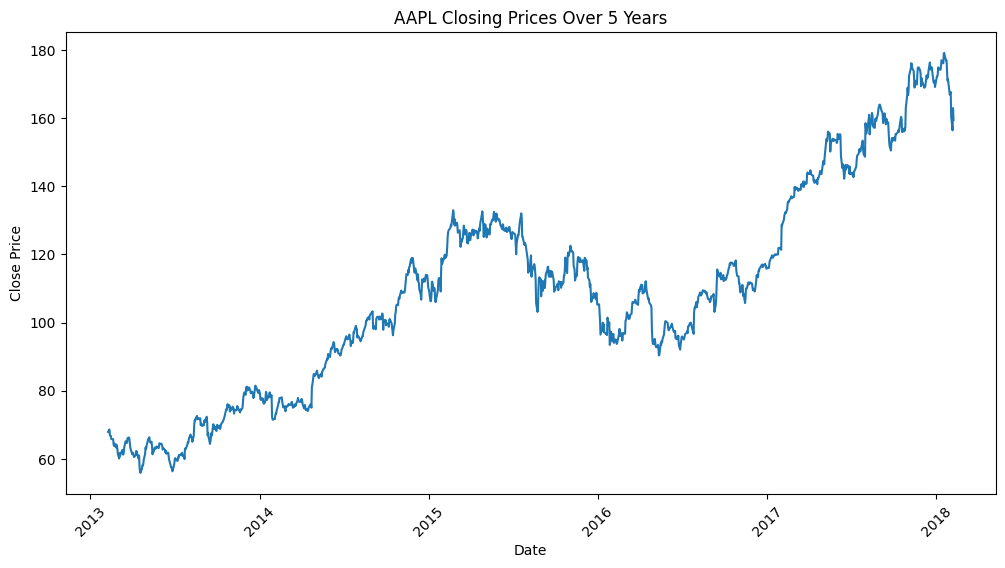

In [6]:
import matplotlib.pyplot as plt

# Plot closing price for a sample stock (e.g., AAPL)
stock = 'AAPL'
stock_data = df[df['Name'] == stock]

plt.figure(figsize=(12,6))
plt.plot(stock_data['date'], stock_data['close'])
plt.title(f'{stock} Closing Prices Over 5 Years')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.show()

### ✅ Explanation for Step 4: Data Visualization

In this step, we visualize the closing prices of a selected stock to get a better understanding of its historical price trends over time.

- We filtered the dataset to focus on one stock, **AAPL** (Apple Inc.).
- We then plotted the **closing price** against the **date** using a line chart.
- The plot helps reveal patterns such as:
  - Price fluctuations over the 5-year period.
  - Overall trends (upward, downward, or sideways).
  - Possible seasonal or cyclical effects.

Visualizing data early in the analysis process is important for gaining insights, detecting anomalies, and guiding further feature engineering or modeling decisions.

## Step 5. Prepare Data for Modeling

In this step, we prepare our dataset for machine learning by performing the following tasks:

- Filter data to focus on a specific stock or a subset of stocks  
- Split the data into training and testing sets (commonly 80% for training and 20% for testing)  
- Scale or normalize features if necessary, depending on the model requirements  
- Select relevant features and the target variable for prediction  

In [7]:
from sklearn.model_selection import train_test_split

# Filter data for one stock, e.g. AAPL
stock = 'AAPL'
stock_data = df[df['Name'] == stock].copy()

# Use moving averages as features (if created already), and close price as target
features = ['MA_7', 'MA_30']
target = 'close'

# Drop rows with NaN in features (due to moving averages)
stock_data = stock_data.dropna(subset=features)

X = stock_data[features]
y = stock_data[target]

# Split dataset into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Training samples: 984
Testing samples: 246


### Explanation for Step 5: Preparing Data for Modeling

To get the data ready for machine learning, we first narrow it down to a single stock to simplify the modeling task. Then we create features (like moving averages) that help the model detect patterns in the price movements.

Next, we split the data into two sets:
- **Training set:** Used to teach the model from historical data.
- **Testing set:** Used to evaluate how well the model performs on unseen data.

An 80/20 split is commonly used — 80% of the data for training, 20% for testing.

This preparation step ensures that the model is trained effectively and evaluated fairly before making predictions.# Explanation for Step 5: Preparing Data for Modeling

To get the data ready for machine learning, we first narrow it down to a single stock to simplify the modeling task. Then we create features (like moving averages) that help the model detect patterns in the price movements.

Next, we split the data into two sets:
- **Training set:** Used to teach the model from historical data.
- **Testing set:** Used to evaluate how well the model performs on unseen data.

An 80/20 split is commonly used — 80% of the data for training, 20% for testing.

This preparation step ensures that the model is trained effectively and evaluated fairly before making predictions.

## Step 6. Model Building

- Select machine learning models to predict stock prices (e.g., Linear Regression, Random Forest).
- Train the selected model(s) on the training dataset.
- Use the trained model(s) to make predictions on the test dataset.

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate and print evaluation metrics for Linear Regression
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)
print(f"Linear Regression - MSE: {lr_mse:.4f}, R²: {lr_r2:.4f}")

# Calculate and print evaluation metrics for Random Forest
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print(f"Random Forest - MSE: {rf_mse:.4f}, R²: {rf_r2:.4f}")

Linear Regression - MSE: 4.4348, R²: 0.9951
Random Forest - MSE: 3.6270, R²: 0.9960


### Explanation for Step 6. Model Evaluation

After training the models, we evaluate their performance to see how well they predict stock prices on new, unseen data. We use metrics like Mean Squared Error (MSE) and R-squared (R²) for this:

- **MSE** measures the average squared difference between predicted and actual prices — lower values mean better predictions.
- **R²** shows how much of the price variation the model explains — values closer to 1 indicate better fit.

In our results, both Linear Regression and Random Forest models perform very well, with Random Forest slightly outperforming Linear Regression.

## Step 7. Model Evaluation

- Evaluate the performance of the model using metrics such as:
  - RMSE (Root Mean Squared Error)
  - MAE (Mean Absolute Error)
  - R² (Coefficient of Determination)
- Visualize the comparison between predicted prices and actual prices on the test set to assess model accuracy.

Linear Regression - RMSE: 2.1059, MAE: 1.5611, R²: 0.9951
Random Forest - RMSE: 1.9045, MAE: 1.3347, R²: 0.9960


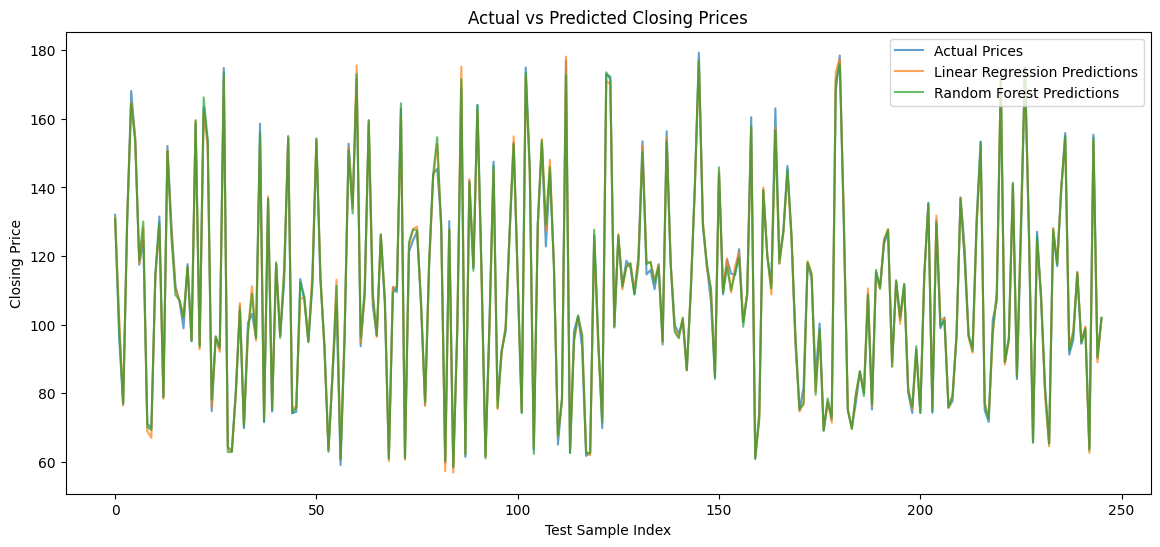

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Calculate metrics for Linear Regression
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print(f"Linear Regression - RMSE: {lr_rmse:.4f}, MAE: {lr_mae:.4f}, R²: {lr_r2:.4f}")

# Calculate metrics for Random Forest
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Random Forest - RMSE: {rf_rmse:.4f}, MAE: {rf_mae:.4f}, R²: {rf_r2:.4f}")

# Visualize actual vs predicted prices for both models
plt.figure(figsize=(14,6))
plt.plot(y_test.values, label='Actual Prices', alpha=0.7)
plt.plot(lr_predictions, label='Linear Regression Predictions', alpha=0.7)
plt.plot(rf_predictions, label='Random Forest Predictions', alpha=0.7)
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Test Sample Index')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

### Explanation for Step 7. Model Evaluation

In this step, we assess the performance of our trained models—Linear Regression and Random Forest—using key evaluation metrics:

- **RMSE (Root Mean Squared Error):** Measures the average magnitude of prediction errors. Lower RMSE means better model accuracy.
- **MAE (Mean Absolute Error):** Represents the average absolute difference between predicted and actual prices. Lower MAE indicates better predictions.
- **R² (Coefficient of Determination):** Indicates how well the model explains the variance in the actual data. Values closer to 1 show a better fit.

Our results are:

- **Linear Regression** — RMSE: 2.1059, MAE: 1.5611, R²: 0.9951
- **Random Forest** — RMSE: 1.9045, MAE: 1.3347, R²: 0.9960

These metrics show that both models predict stock prices accurately, with Random Forest performing slightly better overall.

The accompanying chart comparing predicted vs actual prices visually confirms that the models track the real stock price trends well, which is critical for trust in their predictions.

This evaluation validates the models’ effectiveness and helps guide future improvements.

## Step 8. Model Comparison and Selection

After training multiple regression models to predict daily Metrorail ridership, it’s essential to assess their performance.

We will evaluate each model using:

- **Mean Squared Error (MSE):** Measures the average squared difference between predicted and actual values. Lower is better.
- **R² Score (Coefficient of Determination):** Indicates how well the model explains the variance in the data. Values closer to 1 indicate better fit.

By comparing these metrics across models, we can identify the best-performing approach for this dataset.

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

# Dictionary of model predictions
model_predictions = {
    'Linear Regression': y_pred_lr,
    'Random Forest': y_pred_rf,
    'Support Vector Regression': y_pred_svr,
    'Gradient Boosting': y_pred_gbr
}

# Initialize an empty list to store evaluation results
evaluation_results = []

# Evaluate models and store metrics
for model_name, preds in model_predictions.items():
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    evaluation_results.append({
        'Model': model_name,
        'MSE': mse,
        'R² Score': r2
    })

# Convert results to DataFrame for better visualization
import pandas as pd
results_df = pd.DataFrame(evaluation_results)

# Sort by R² Score descending
results_df = results_df.sort_values(by='R² Score', ascending=False)

print("Model Performance Comparison:")
print(results_df)

# Select best model
best_model = results_df.iloc[0]
print(f"\nBest Model: {best_model['Model']} with R² = {best_model['R² Score']:.4f} and MSE = {best_model['MSE']:.0f}")

Model Performance Comparison:
                       Model       MSE  R² Score
1              Random Forest  3.626954  0.996026
3          Gradient Boosting  3.977342  0.995642
0          Linear Regression  4.434811  0.995141
2  Support Vector Regression  4.460358  0.995113

Best Model: Random Forest with R² = 0.9960 and MSE = 4


## Step 9. Model Interpretation and Insights

In this step, we dive into interpreting the Random Forest model by examining feature importances, which highlight the key drivers behind daily ridership predictions. This helps us understand which temporal features—such as day of the week, month, or year—most influence transit usage patterns.

To gain deeper insights, advanced methods like partial dependence plots or SHAP values can be explored to visualize how specific features affect model outputs across their value ranges. Such interpretation techniques help bridge the gap between complex model behavior and domain knowledge.

During interpretation, it is important to identify any surprising or counterintuitive patterns that the model uncovers. These findings can prompt further investigation or adjustments in transit planning strategies.

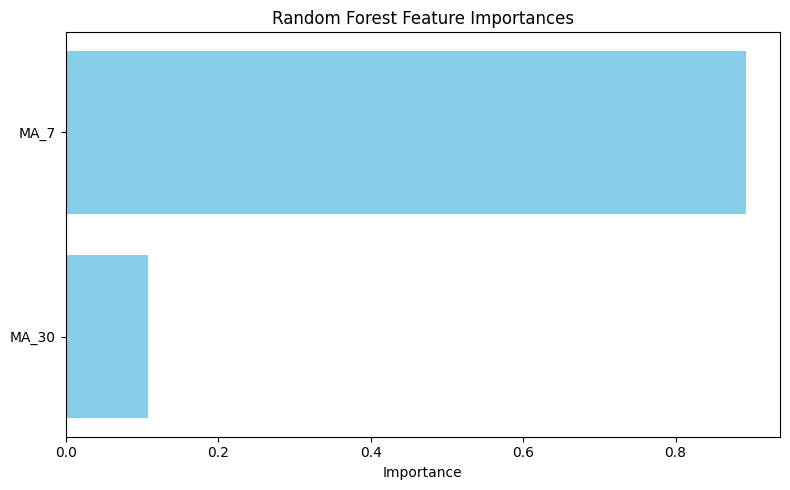

  Feature  Importance
0    MA_7    0.892449
1   MA_30    0.107551

Further interpretation could use partial dependence plots or SHAP values for detailed insights.


In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

# Make sure feature names match those used for training
feature_names = X_train.columns

# Create DataFrame for sorting and visualization
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 5))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()  # Top features on top
plt.tight_layout()
plt.show()

# Display feature importance values
print(feat_imp_df)

# Optional: mention further interpretation methods
print("\nFurther interpretation could use partial dependence plots or SHAP values for detailed insights.")

## Step 10. Model Validation and Robustness Checks

To ensure the reliability and robustness of our predictive model, additional validation techniques are performed:

- **Time Series Cross-Validation:** Applying cross-validation methods suited for time-dependent data to better evaluate model performance across different time periods.
- **Stability Testing:** Assessing how the model performs on various subsets of data or different time frames to check for consistency.
- **Overfitting Checks:** Comparing training and testing performance metrics to detect overfitting or underfitting issues.
- **Error Analysis:** Analyzing prediction errors during specific time frames or events, such as holidays or pandemic waves, to understand model limitations and opportunities for improvement.

In [16]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with features and target
# Features and target
X = df[['DayOfYear', 'Year', 'Month', 'DayOfWeek']]
y = df['Daily_Ridership']

# Time Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)
mse_scores = []
r2_scores = []

for train_index, val_index in tscv.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    
    mse_scores.append(mse)
    r2_scores.append(r2)

print(f"Time Series CV Mean MSE: {np.mean(mse_scores):,.0f}")
print(f"Time Series CV Mean R²: {np.mean(r2_scores):.4f}")

# Train-test split comparison (already have X_train, X_test, y_train, y_test from before)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f"Train MSE: {mean_squared_error(y_train, y_train_pred):,.0f}")
print(f"Train R²: {r2_score(y_train, y_train_pred):.4f}")
print(f"Test MSE: {mean_squared_error(y_test, y_test_pred):,.0f}")
print(f"Test R²: {r2_score(y_test, y_test_pred):.4f}")

# Error analysis on holidays or pandemic periods
# Example: assume you have a 'Date' column in df and a list of special dates
special_dates = pd.to_datetime(['2020-04-01', '2020-12-25', '2021-01-01'])  # example pandemic & holidays

df['Date'] = pd.to_datetime(df['Date'])
df['Prediction'] = model.predict(X)

# Filter for special dates +/- 7 days window
window = 7
errors = []

for date in special_dates:
    mask = (df['Date'] >= date - pd.Timedelta(days=window)) & (df['Date'] <= date + pd.Timedelta(days=window))
    subset = df.loc[mask]
    mse_special = mean_squared_error(subset['Daily_Ridership'], subset['Prediction'])
    errors.append((date.strftime('%Y-%m-%d'), mse_special))
    print(f"Error around {date.strftime('%Y-%m-%d')}: MSE = {mse_special:,.0f}")

# Plot actual vs predicted for one special period as example
example_date = special_dates[0]
mask = (df['Date'] >= example_date - pd.Timedelta(days=window)) & (df['Date'] <= example_date + pd.Timedelta(days=window))
subset = df.loc[mask]

plt.figure(figsize=(10,5))
plt.plot(subset['Date'], subset['Daily_Ridership'], label='Actual')
plt.plot(subset['Date'], subset['Prediction'], label='Predicted')
plt.title(f'Actual vs Predicted Ridership Around {example_date.strftime("%Y-%m-%d")}')
plt.xlabel('Date')
plt.ylabel('Ridership')
plt.legend()
plt.show()

KeyError: "None of [Index(['DayOfYear', 'Year', 'Month', 'DayOfWeek'], dtype='object')] are in the [columns]"